**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica: OpenCV y Operaciones de punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Leer y mostrar una imagen con OpenCV**

Lectura -> cv2.imread(ruta de imagen, opc*)
 * Corregir colores usando indexación
 * Corregir colores cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 * opc -> cv2.IMREAD_GRAYSCALE

In [2]:
imgSRC = './lab_images/robotSofia.jpg'

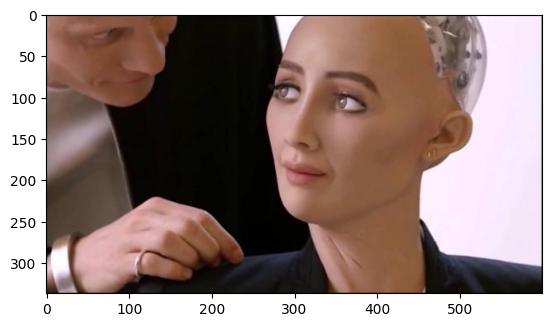

In [10]:
img = cv2.imread(imgSRC) #[..., ::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

P1. Que sucede si usamos matplotlib para mostrar una imágen leída con openCV?

Si usamos matplotlib para mostrar una imagen leída con OpenCV, los colores se verán alterados. Esto ocurre porque OpenCV carga las imágenes en formato BGR, mientras que matplotlib espera el formato RGB. Por eso, si se muestra directamente, los canales de color quedan invertidos y la imagen se ve con colores incorrectos.

### **Consideraciones al mostrar imagenes con matplotlib**

*Imagen en escala de grises*

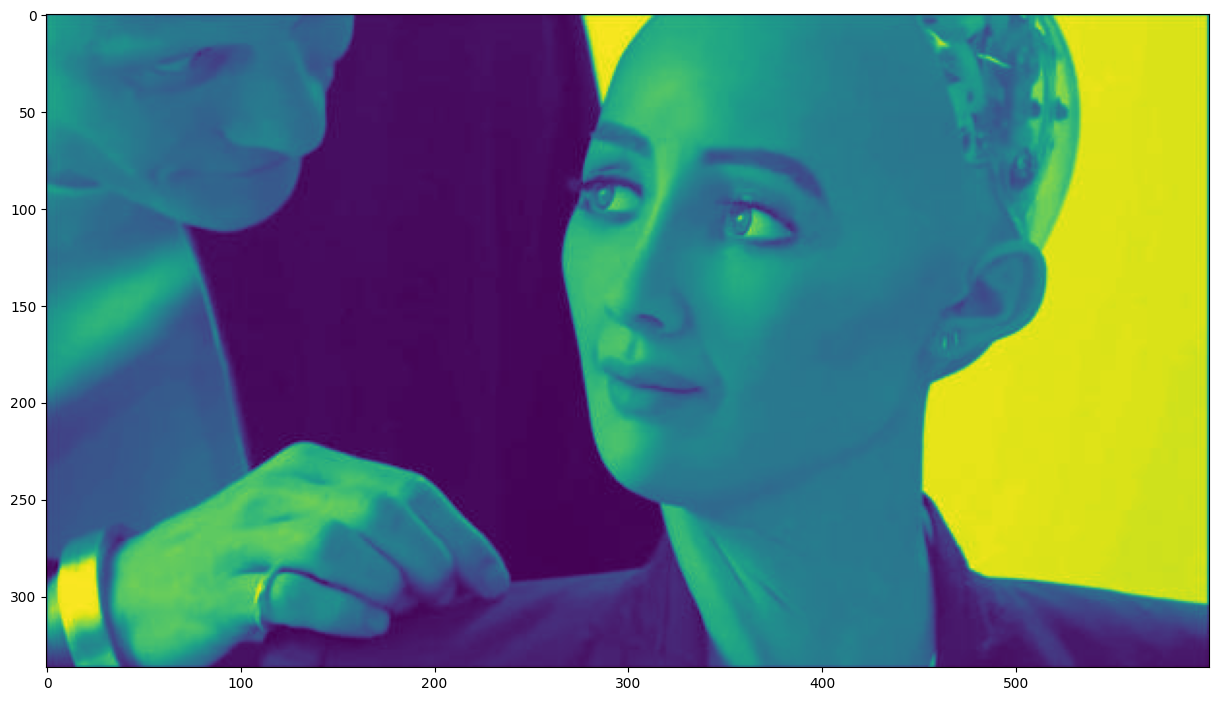

In [ ]:
img = cv2.imread(imgSRC,0)
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

 * Se realiza un autoescalado 

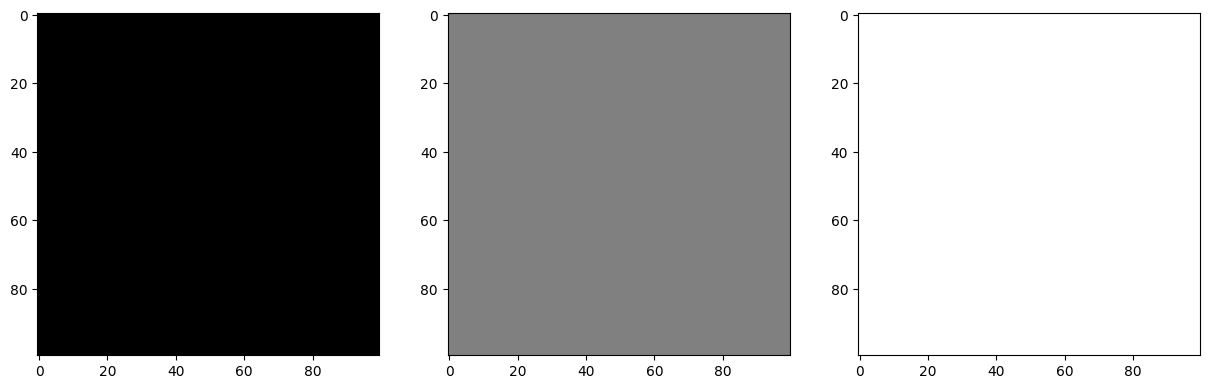

In [15]:
black = np.zeros([100, 100], dtype=np.uint8)
gray = np.ones([100, 100], dtype=np.uint8) * 128
white = np.ones([100, 100], dtype=np.uint8) * 255

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(black, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.show()

P2. Explique la utilidad de vmin y vmax y cuando es importante tenerlo en cuenta

`vmin` y `vmax` sirven para indicar el rango mínimo y máximo de intensidad que se usará para mostrar la imagen. En imágenes en escala de grises, estos valores controlan cómo se asignan los colores del mapa de color a los valores de la matriz. Si no se especifican, matplotlib ajusta automáticamente el contraste según los valores presentes en la imagen, lo que puede causar que imágenes diferentes no se comparen correctamente entre sí. En este caso, usar `vmin=0` y `vmax=255` asegura que las tres imágenes se muestren con la misma escala de grises: la imagen “black” aparece totalmente negra porque sus valores están en el mínimo, la imagen “gray” aparece en gris medio porque tiene valores intermedios, y la imagen “white” aparece blanca porque está en el valor máximo. Es importante tener esto en cuenta cuando se quieren comparar imágenes o cuando se desea mantener una referencia visual constante del contraste.


### **Escalando los colores y dibujando dentro de una imagen**


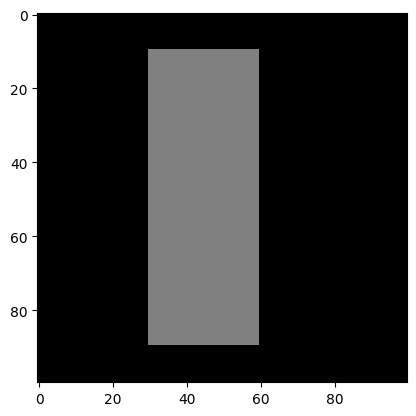

In [18]:
black = np.zeros([100, 100], dtype=np.uint8)
black[10:90, 30:60] = 128

black = black/255

plt.imshow(black, cmap='gray', vmin=0, vmax=1)
plt.show()

P3. Que tipo de dato es la imagen despues de dividir entre 255? 

Después de dividir la imagen entre 255, los valores ya no son enteros, sino que se convierten en números decimales tipo float (generalmente float64). La imagen deja de estar en el rango 0–255 y pasa a estar en el rango 0–1.

P4. Explique como funcionan los ejes en las imágenes mostradas en python.

En Python, las imágenes se representan como matrices donde el eje vertical (filas) corresponde al eje y y el eje horizontal (columnas) corresponde al eje x. El punto (0,0) está en la esquina superior izquierda de la imagen. A medida que se incrementa el eje y, se baja en la imagen, y a medida que se incrementa el eje x, se avanza hacia la derecha.

### **Creando formas dentro de una imagen con numpy y OpenCV**
 * cv2.rectangle(img, pt1, pt2, (color RGB), thickness= )
 * cv2.line(img, pt1, pt2, (color RGB),thickness= )

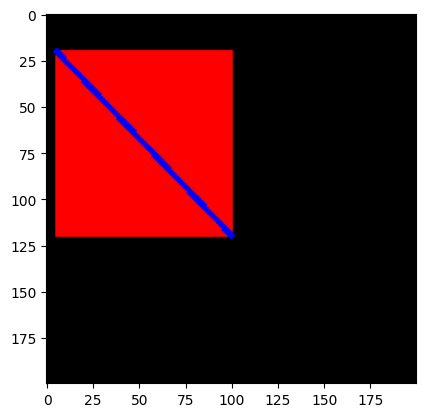

In [20]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (5, 20)
PT2 = (100,120)
cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

* cv2.circle(img, (centro), radio, (color), thickness=)

* cv2.putText(img, "Texto", (punto de inicio), fuente, tamaño, (color), thickness=)
 * fuente -> cv2.FONT_HERSHEY_SIMPLEX

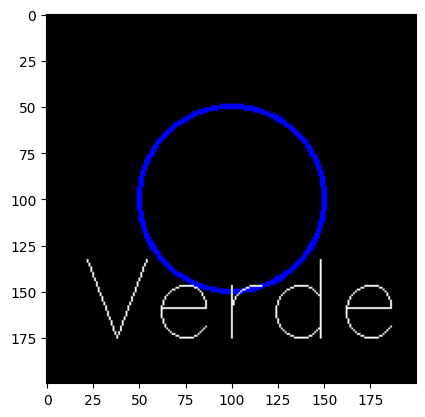

In [22]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (0, 20)
PT2 = (100,120)

# cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
# cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)
cv2.circle(black, (100,100), 50, (255,0,0), thickness=2)
cv2.putText(black, "Verde", (20,175), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

### Cambiar tamaño de una imagen con OpenCV-> [resize](https://pythonexamples.org/python-opencv-cv2-resize-image/)

cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

*******
* INTER_NEAREST
* INTER_LINEAR
* INTER_AREA
* INTER_CUBIC
* INTER_LANCZOS4

In [3]:
img = cv2.imread(imgSRC)[...,::-1]

# img_resize_small = cv2.resize(img, None, fx=1/2, fy=1/3, interpolation=cv2.INTER_LINEAR)
img_resize_small = cv2.resize(img, (150,150), interpolation=cv2.INTER_LANCZOS4)
img_resize_big = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

print(img.shape)
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img_resize_small)
plt.subplot(133)
plt.imshow(img_resize_big)
plt.show()

NameError: name 'imgSRC' is not defined

P5. Cree un bucle para mostrar la imágen original y el efecto de las 5 diferentes interpolaciones al escalar a la mitad su ancho y largo. Se nota la diferencia?

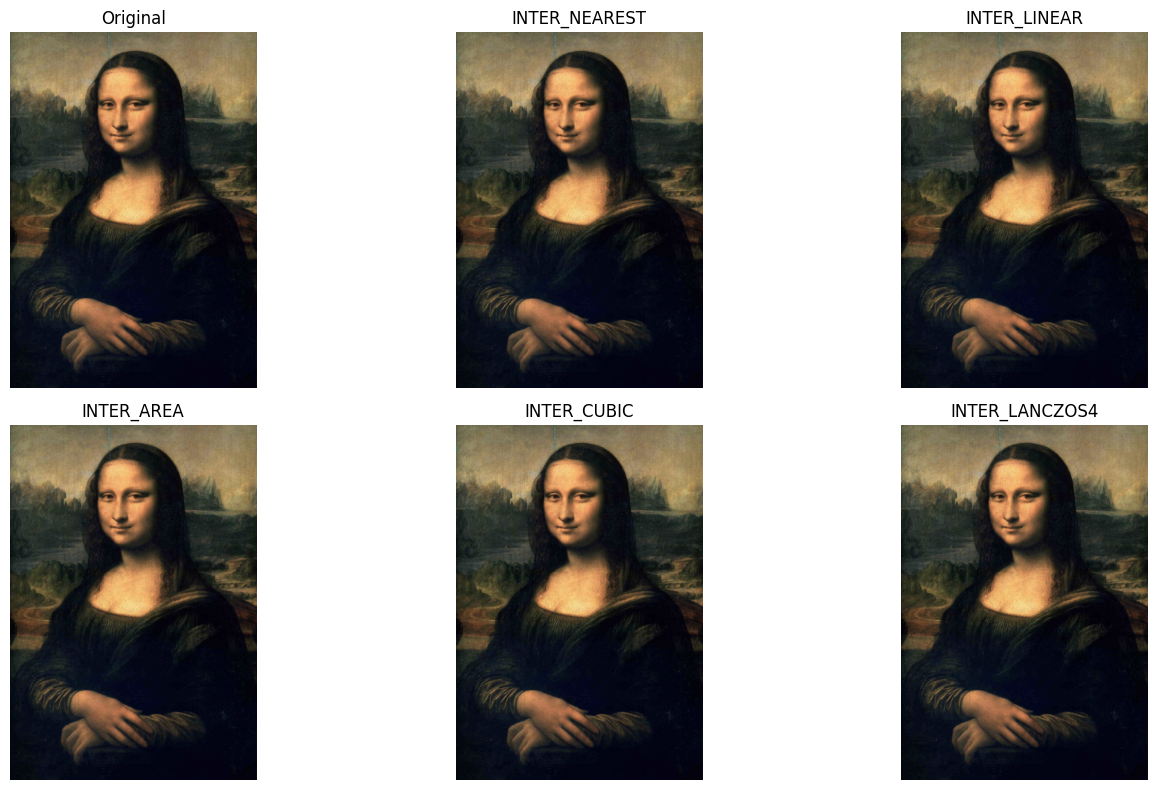

In [5]:
import cv2
import matplotlib.pyplot as plt

# Ruta directa de la imagen
img_path = "D:/PROCESAMIENTO DE SENALES/gioconda.jpg"

# Leer imagen
img = cv2.imread(img_path)

# Verificar carga
if img is None:
    raise ValueError("La imagen no se pudo cargar. Verifica la ruta.")

# Convertir a RGB para mostrar correctamente
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Escala a la mitad
h, w = img.shape[:2]
new_size = (w//2, h//2)

# Tipos de interpolación
interpolaciones = {
    "INTER_NEAREST": cv2.INTER_NEAREST,
    "INTER_LINEAR": cv2.INTER_LINEAR,
    "INTER_AREA": cv2.INTER_AREA,
    "INTER_CUBIC": cv2.INTER_CUBIC,
    "INTER_LANCZOS4": cv2.INTER_LANCZOS4
}

# Mostrar resultados
plt.figure(figsize=(15,8))

# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

i = 2
for nombre, metodo in interpolaciones.items():
    img_resized = cv2.resize(img, new_size, interpolation=metodo)
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i)
    plt.imshow(img_resized)
    plt.title(nombre)
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()


### Mostrar imagen con OpenCV en una ventana
HACER ESTO FUERA DE UN NOTEBOOK

cv2.imshow(nombre de ventana, imagen)
* cv2.waitKey(0)  
* cv2.destroyAllWindows()  

In [ ]:
# img = cv2.imread(imgSRC)
# cv2.imshow('Robot Sofia', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# <font color=#FF0000>Operaciones de punto</color>


### Negativo de una imagen

* s = 255- f(r)

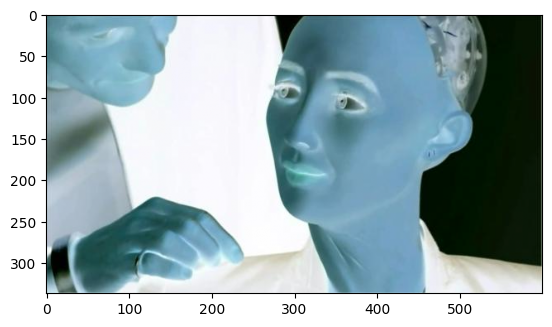

In [ ]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = 1 - r
plt.imshow(s)
plt.show()

### Tranformacion Logarítmica
* s = c.log(1+r)

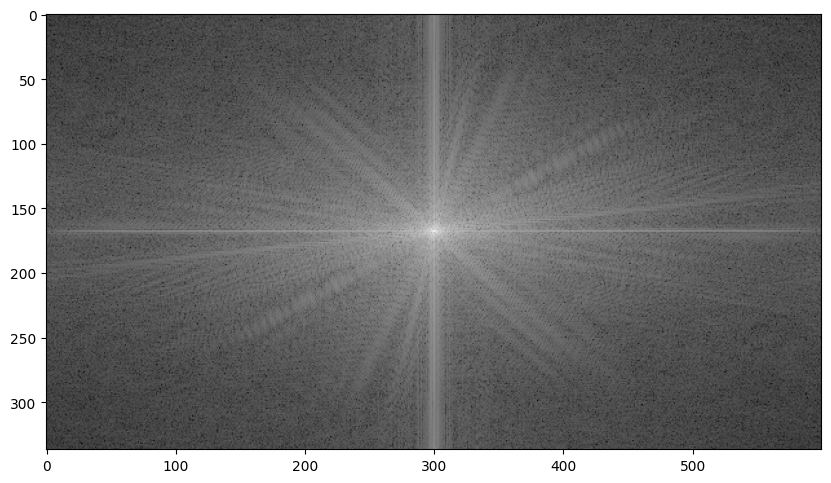

In [ ]:
img = cv2.imread(imgSRC, 0)

fft_2 = np.fft.fft2(img)
fft_2_abs = np.abs(fft_2)
fft_2_abs = np.fft.fftshift(fft_2_abs)
fft_2_abs_log = np.log(fft_2_abs+1)

plt.figure(figsize=(10,15))
plt.imshow(fft_2_abs_log, cmap='gray')
plt.show()

P6. Compruebe cuanto son los valores mínimo y máximo de la imagen original y de la imágen que muestra el espectro. Luego describa que efecto tuvo la transformación logarítmica.

En la imagen original los valores mínimo y máximo están entre 0 y 255 porque es una imagen en escala de grises. En el espectro de la transformada de Fourier los valores pueden variar desde muy pequeños hasta valores muy grandes, por lo que existe una gran diferencia de magnitudes. La transformación logarítmica reduce la diferencia entre valores altos y bajos, comprimiendo los valores grandes y ampliando los pequeños. Esto permite que el espectro pueda visualizarse de manera clara, mostrando detalles que sin la transformación se verían casi negros o sin contraste.

### Transformación Gamma
###   $s=cr^\gamma $

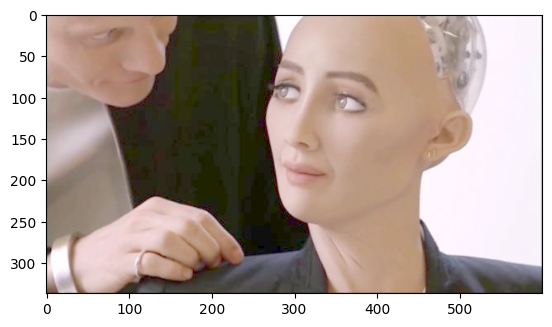

In [ ]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = r**0.5
plt.imshow(s)
plt.show()

### Transformación arbitraria
* ####   Especificar una funcion de transformacion
cv2.LUT(img, lut)

In [ ]:
img.shape

(337, 600)

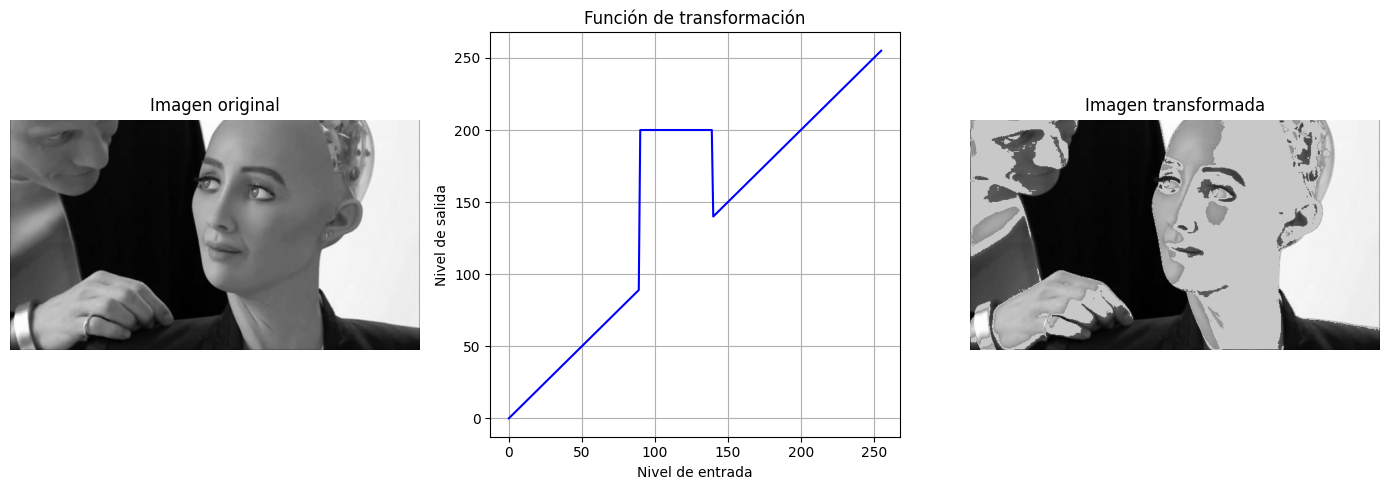

In [ ]:
funcion_ejemplo = np.arange(256)
funcion_ejemplo[90:140] = 200

img = cv2.imread(imgSRC, 0)
img_out = funcion_ejemplo[img]

fig, axs = plt.subplots(1, 3, figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.plot(funcion_ejemplo, color="blue")
plt.title("Función de transformación")
plt.xlabel("Nivel de entrada")
plt.ylabel("Nivel de salida")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(img_out, cmap="gray", vmin=0, vmax=255)
plt.title("Imagen transformada")
plt.axis("off")

plt.tight_layout()
plt.show()


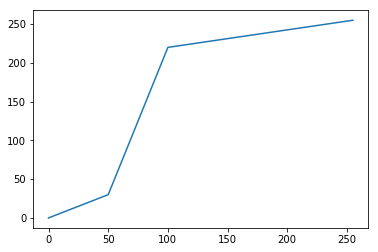

In [ ]:
r = np.zeros(256)

for pix in range(256):
    if pix < 50:
        r[pix] = 30/50*(pix-50) + 30
    if 50 <=pix < 100:
        r[pix] = 190/50*(pix-50) + 30
    if 100 <=pix:
        r[pix] = 35/155*(pix-100) + 220

plt.plot(r)
plt.show()

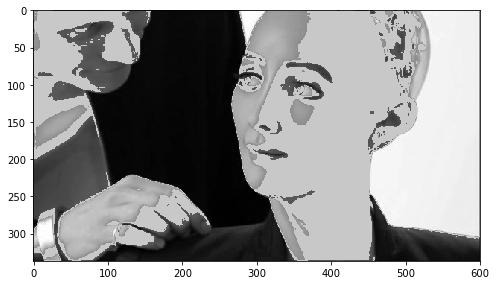

In [ ]:
img = cv2.imread(imgSRC,0)
s=cv2.LUT(img, funcion_ejemplo)
plt.figure(figsize=(8,10))
plt.imshow(s, cmap='gray')
plt.show()

### División en capas de bits 

* np.bitwise_and(imagen, bit)

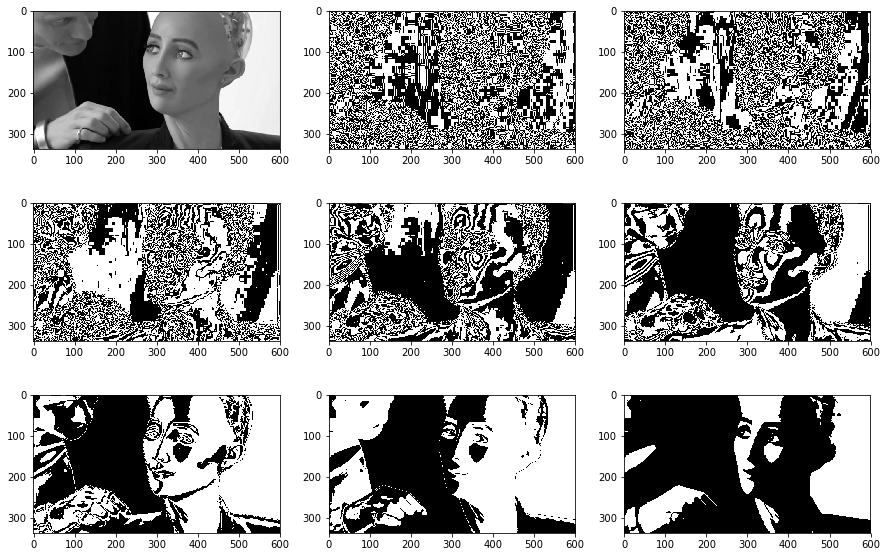

In [ ]:
img = cv2.imread(imgSRC, 0)

img7 = cv2.bitwise_and(img, 128)
img6 = cv2.bitwise_and(img, 64)
img5 = cv2.bitwise_and(img, 32)
img4 = cv2.bitwise_and(img, 16)
img3 = cv2.bitwise_and(img, 8)
img2 = cv2.bitwise_and(img, 4)
img1 = cv2.bitwise_and(img, 2)
img0 = cv2.bitwise_and(img, 1)

plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img0, cmap="gray")
plt.subplot(333)
plt.imshow(img1, cmap="gray")
plt.subplot(334)
plt.imshow(img2, cmap="gray")
plt.subplot(335)
plt.imshow(img3, cmap="gray")
plt.subplot(336)
plt.imshow(img4, cmap="gray")
plt.subplot(337)
plt.imshow(img5, cmap="gray")
plt.subplot(338)
plt.imshow(img6, cmap="gray")
plt.subplot(339)
plt.imshow(img7, cmap="gray")

#### Mostrar solo las 5 capas mas significativas

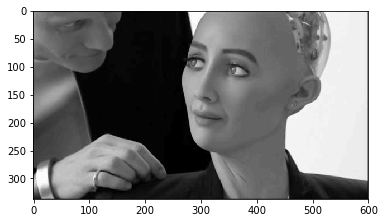

In [ ]:
img_comprimida = img7+ img6 + img5 + img4 + img3 + img2
plt.imshow(img_comprimida, cmap="gray", vmin=0, vmax=255)

P7. Si usted quisiera encriptar un  mensaje dentro de una fotografía, como lo haría?

Para encriptar un mensaje dentro de una fotografía se puede usar la técnica de esteganografía, específicamente modificando el bit menos significativo (LSB) de los píxeles. La idea es que cada píxel de una imagen está compuesto por valores numéricos, y cambiar solo el último bit de esos valores no altera visiblemente la imagen, pero permite esconder información. Se convierte el mensaje en bits y luego esos bits se insertan uno por uno en los bits menos significativos de los valores de los píxeles. Para recuperar el mensaje, se leen nuevamente esos bits LSB y se reconstruye el texto original.

### Histograma de una imagen
* np.histogram(img, bins, [rango de datos])  (requiere plotear)
* plt.hist(img.ravel(), bins, [rango de datos])
* cv2.calcHist([img], [canal], mascara,[bins], [rango de datos])

#####  Normalizar CDF $ \frac{cdf*hist.max}{cdf.max} $

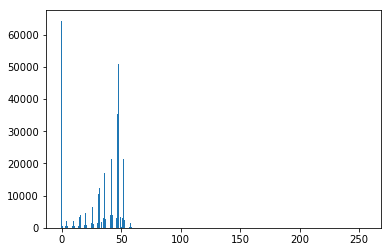

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

hist, bins = np.histogram(img_gray, 256, [0, 256])
plt.bar(np.arange(256), hist)
plt.show()

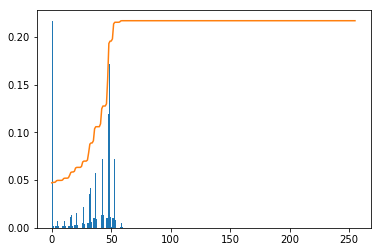

In [ ]:
#matplotlib
hist = plt.hist(img_gray.ravel(), 256, [0,256], density=True)
cdf = np.cumsum(hist[0])
cdf_norm = cdf*(hist[0].max())/(cdf.max())
plt.plot(cdf_norm)

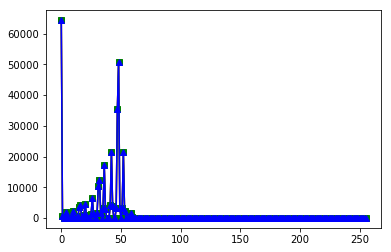

In [ ]:
# openCV
color = ("r*-", "gs-", "b^-")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None,[256], [0,256])
    plt.plot(hist, col)

### Equalización de Histograma
* cv2.equalizeHist(img) 

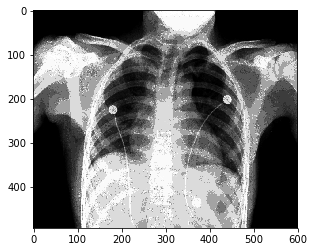

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

img_equ = cv2.equalizeHist(img_gray)
plt.imshow(img_equ, cmap="gray", vmin=0, vmax=255)

P8. Que sucede durante la equalización de histograma?

Durante la ecualización de histograma se redistribuyen los niveles de intensidad de la imagen para que la cantidad de píxeles esté más uniformemente repartida a lo largo de todo el rango de valores posibles. Esto provoca que las zonas oscuras y claras ganen contraste. En otras palabras, la imagen se transforma para aprovechar mejor todo el rango dinámico, haciendo que los detalles que antes estaban poco visibles se vuelvan más notorios.

### Equalización de Histograma adaptativa
*clahe = createCLAHE() 
*clahe.apply(img) 

* [CLAHE Histogram Eqalization](https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/)

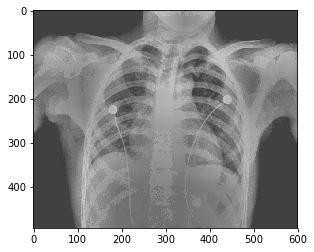

In [ ]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(img_gray) + 60

plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

P8. Que diferencias ve usted en la equalización normal y la equalización adaptativa (CLAHE)

En la ecualización de histograma normal se toma toda la imagen completa y se redistribuyen los niveles de intensidad de manera global. Esto puede generar demasiado contraste en algunas zonas y producir que áreas muy claras o muy oscuras se saturen, perdiendo detalle.

En cambio, en la ecualización adaptativa (CLAHE) la imagen se divide en pequeñas regiones y se ecualiza cada parte por separado. Además, se limita el nivel de contraste para evitar saturación. Esto permite mejorar el contraste de manera más equilibrada, manteniendo detalles en zonas oscuras y claras sin crear efectos exagerados.

## Histogram Matching

Aplique a una foto suya el estilo de la monalisa usando histogram matching. Use estas guías como referencia

https://www.pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/
https://automaticaddison.com/how-to-do-histogram-matching-using-opencv/


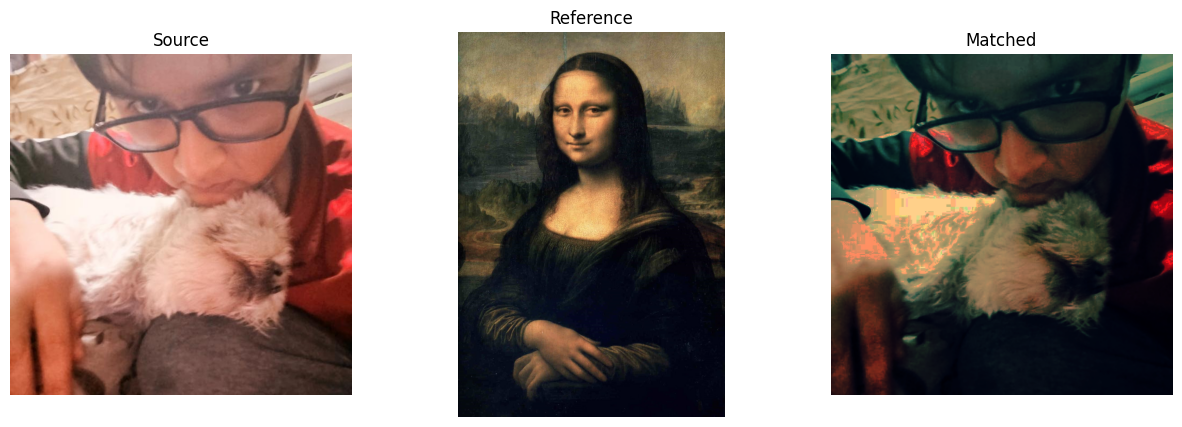

In [ ]:
import cv2
from skimage import exposure
import matplotlib.pyplot as plt

# ---- RUTAS ESCRITAS MANUALMENTE ----
src_path = "D:/PROCESAMIENTO DE SENALES/sebas.jpg"
ref_path = "D:/PROCESAMIENTO DE SENALES/gioconda.jpg"

# Leer imágenes
src = cv2.imread(src_path)
ref = cv2.imread(ref_path)

# Ajustar histogramas
matched = exposure.match_histograms(src, ref, channel_axis=-1)

# Convertir BGR -> RGB para mostrar correctamente en matplotlib
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
ref_rgb = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
matched_rgb = cv2.cvtColor(matched, cv2.COLOR_BGR2RGB)

# Mostrar en Notebook
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Source")
plt.imshow(src_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Reference")
plt.imshow(ref_rgb)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Matched")
plt.imshow(matched_rgb)
plt.axis("off")

plt.show()


# INTEGRANTES

1. ALDANA CARRANZA, JUAN JOSE

2. VEREAU FLORES, OSCAR EMILIO
